In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
from scipy import signal

**Simulation**

In [3]:
fs = 250

trial_length = 30

n_samples = fs * trial_length

n_channels = 8

np.random.seed(123)
nonsense = 0.5 * np.random.normal(0, 1, size=(n_samples, n_channels))

time = np.arange(n_samples)

t1 = np.arange(250)
t2 = np.arange(500)
t3 = np.arange(250)
t4 = np.arange(250)
t5 = np.arange(750)

sim_sig1 = 1.0 * np.sin(2 * t1 * np.pi *  2 / fs)
sim_sig2 = 1.0 * np.sin(2 * t2 * np.pi * 7 / fs)
sim_sig3 = 1.0 * np.sin(2 * t3 * np.pi * 16 / fs)
sim_sig4 = 1.0 * np.sin(2 * t4 * np.pi * 32 / fs)
sim_sig5 = 1.0 * np.sin(2 * t5 * np.pi * 40 / fs)

# location of SSVEPs
stim1 = 1000
stim2 = 2000
stim3 = 4000
stim4 = 5000
stim5 = 5500

# add SSVEPs to EEG signals
for ch in range(7):
  nonsense[stim1:stim1+250, ch] = nonsense[stim1:stim1+250, ch] + sim_sig4 # one second of 32 Hz
  nonsense[stim2:stim2+500, ch] = nonsense[stim2:stim2+500, ch] + sim_sig2 # two seconds of 7 Hz
  nonsense[stim3:stim3+250, ch] = nonsense[stim3:stim3+250, ch] + sim_sig1 # one second of 2 Hz
  nonsense[stim4:stim4+750, ch] = nonsense[stim4:stim4+750, ch] + sim_sig5 # three seconds of 40 Hz
  nonsense[stim5:stim5+250, ch] = nonsense[stim5:stim5+250, ch] + sim_sig3 # one second of 16 Hz

# location of artifacts
artifact1 = 500
artifact2 = 3000

# add artifacts to EEG signals
for ch in range(8):
  nonsense[artifact1:artifact1+55, ch] = nonsense[artifact1:artifact1+55, ch] + np.random.normal(6, 3, size=55)
  nonsense[artifact2:artifact2+100, ch] = nonsense[artifact2:artifact2+100, ch] + np.random.normal(6, 3, size=100)

In [4]:
# sanity check
nonsense.shape

(7500, 8)

In [5]:
filt_sigs = np.zeros_like(nonsense)

sos = signal.butter(4, (5, 50), 'bandpass', fs=fs, output='sos') # 5-50 Hz bp filter

for i in range(8):
  filt_sigs[:,i] = signal.sosfilt(sos, nonsense[:,i])

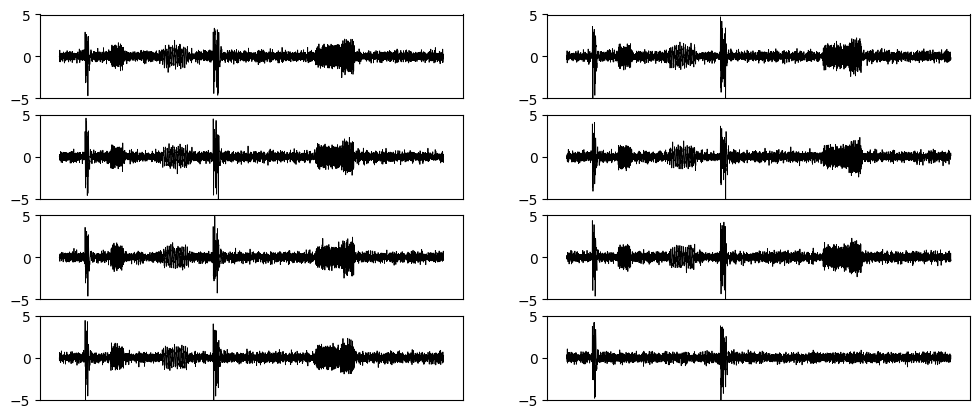

In [6]:
fig, ax = plt.subplots(4, 2, figsize=(12, 5))

c_counter = 1
for i in range(4):
  for j in range(2):
    ax[i, j].plot(filt_sigs[:,c_counter-1], linewidth=0.6, color='black')
    ax[i, j].set_ylim((-5, 5))
    # for major ticks
    ax[i, j].set_xticks([])
    # for minor ticks
    ax[i, j].set_xticks([], minor=True)
    c_counter += 1

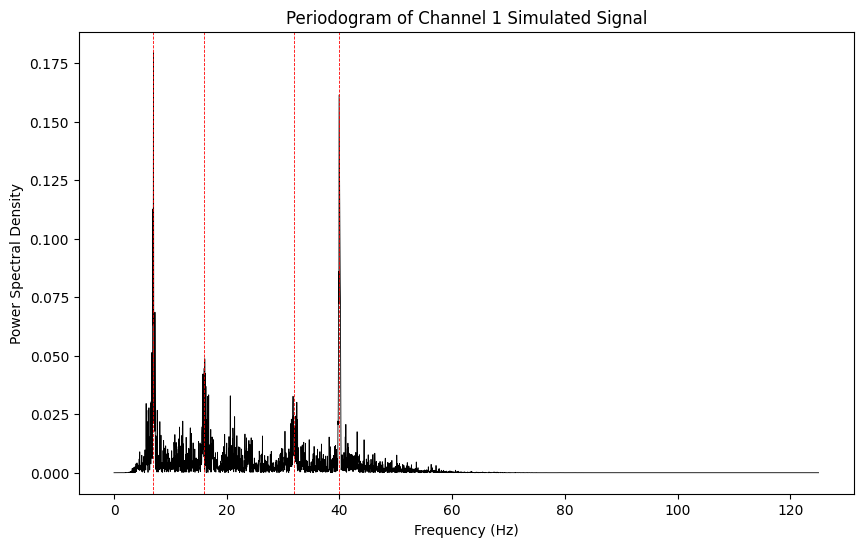

In [19]:
channel1sig = filt_sigs[:,0]
f, Pxx_den = signal.periodogram(channel1sig, fs)

plt.figure(figsize=(10,6))
plt.title("Periodogram of Channel 1 Simulated Signal")
plt.plot(f, Pxx_den, linewidth=0.6, color='k')
plt.axvline(x = 7, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.axvline(x = 16, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.axvline(x = 32, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.axvline(x = 40, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.show()

In [8]:
np.random.seed(0)
ica = FastICA(n_components=2)
S_ = ica.fit_transform(filt_sigs)

A_ = ica.mixing_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


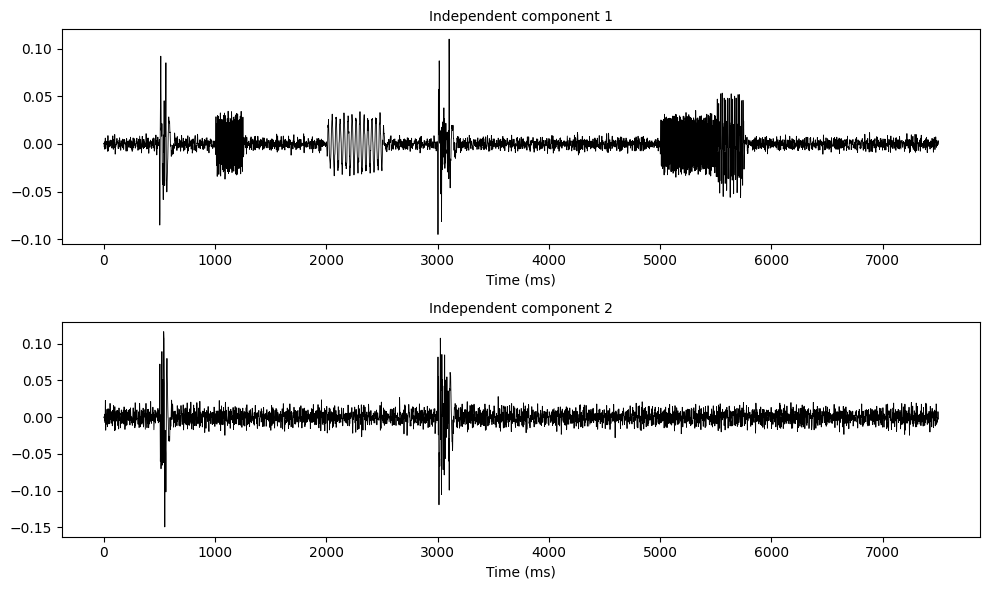

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

for i in range(2):
  ax[i].set_title(f"Independent component {i+1}", fontsize=10)
  ax[i].plot(S_[:, i], linewidth=0.6, color='k')
  ax[i].set_xlabel("Time (ms)")

fig.tight_layout()
plt.show()

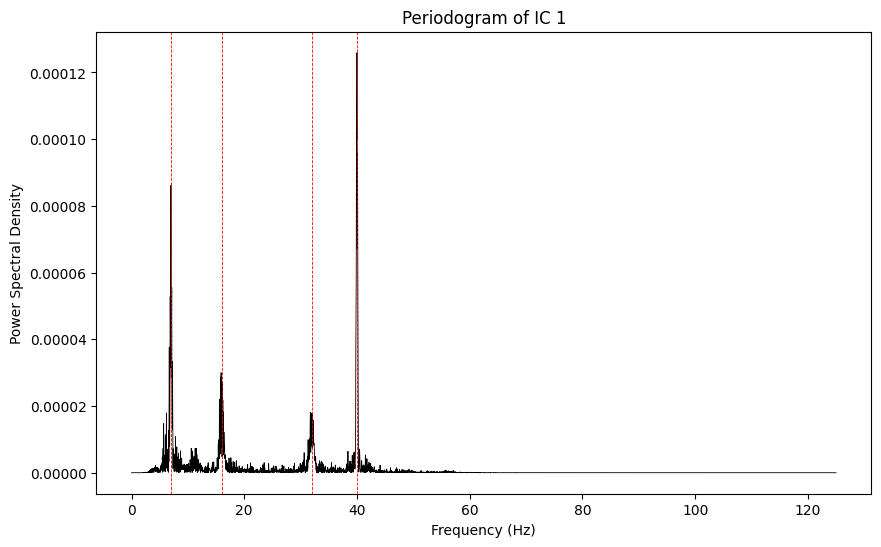

In [18]:
f, Pxx_den = signal.periodogram(S_[:,0], fs)

plt.figure(figsize=(10,6))
plt.title("Periodogram of IC 1")
plt.plot(f, Pxx_den, linewidth=0.6, color='k')
plt.axvline(x = 7, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.axvline(x = 16, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.axvline(x = 32, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.axvline(x = 40, color = 'r', linewidth=0.6, linestyle='dashed', label = 'axvline - full height')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.show()